In [35]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import cv2 as cv 

#Implementacion de la Transformada de Fourier Rapida

In [12]:
#Funcion recursiva
def TransformadaFourier(x):
  n = len(x)    
  if n == 1:
    return x
  else:
    X_par = TransformadaFourier(x[::2])
    X_impar = TransformadaFourier(x[1::2])
    factor = np.exp(-2j*np.pi*np.arange(n)/ n)
      
    Y = np.concatenate([X_par+factor[:int(n/2)]*X_impar, X_par+factor[int(n/2):]*X_impar])
    return Y

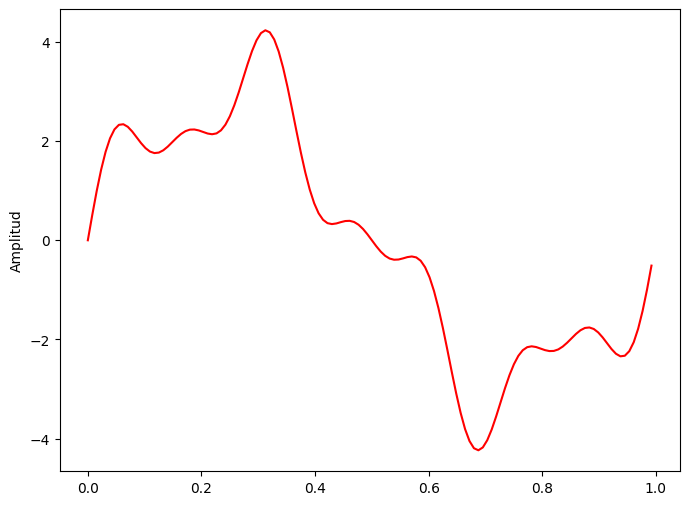

In [20]:
# Creacion de onda de prueba

# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitud')

plt.show()

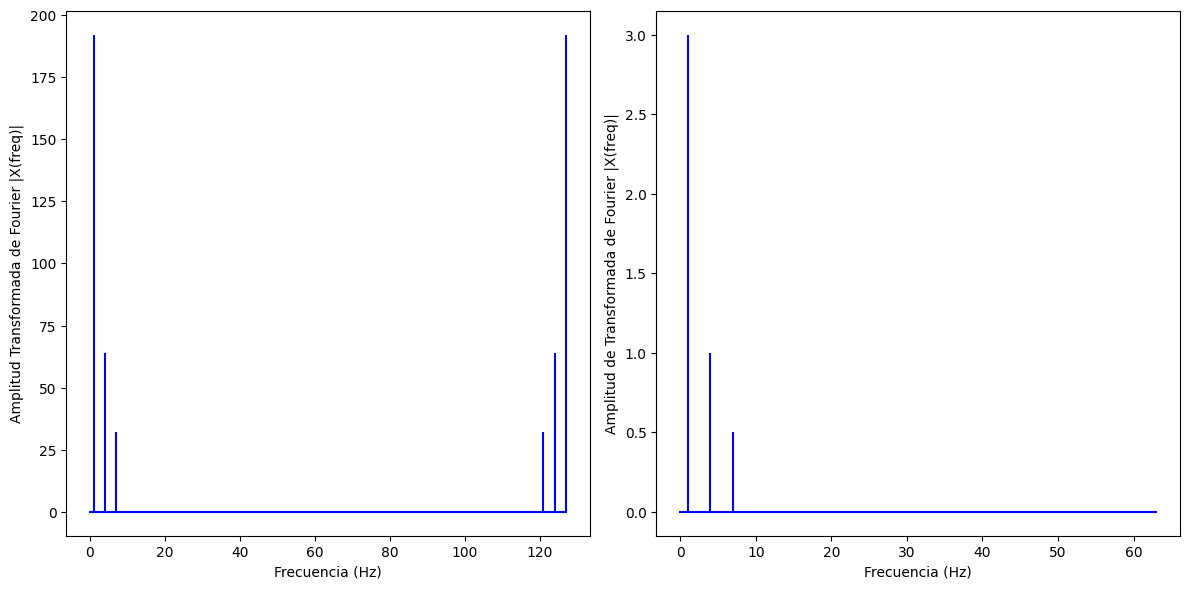

In [22]:
X=TransformadaFourier(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Transformada de Fourier |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud de Transformada de Fourier |X(freq)|')
plt.tight_layout()
plt.show()

#Implementacion en Imagenes

##Prueba 1

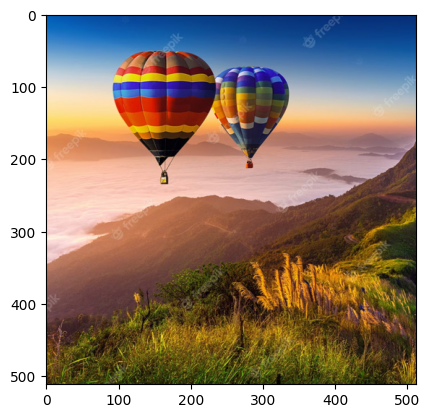

In [25]:
Imagen=io.imread("https://i.ibb.co/0c8By2X/nature.jpg")
plt.imshow(Imagen,vmin=0,vmax=1)
plt.show()

In [29]:
#Funcion TransformadaFourier de una Imagen, dos direcciones
def ImagenTransformadaFourier(Imagen):
  R = Imagen[:,:,0]
  G = Imagen[:,:,1]
  B = Imagen[:,:,2] 

  ColumnasRTransformadaFourier=[]
  ColumnasGTransformadaFourier=[]
  ColumnasBTransformadaFourier=[]

  FilasRTransformadaFourier=[]
  FilasGTransformadaFourier=[]
  FilasBTransformadaFourier=[]

  #Transformada de fourier en las filas
  for i in range(len(R)):
    FilasRTransformadaFourier.append(TransformadaFourier(R[i]))
    FilasGTransformadaFourier.append(TransformadaFourier(G[i]))
    FilasBTransformadaFourier.append(TransformadaFourier(B[i]))
  FilasRTransformadaFourier=np.array(FilasRTransformadaFourier)
  FilasGTransformadaFourier=np.array(FilasGTransformadaFourier)
  FilasBTransformadaFourier=np.array(FilasBTransformadaFourier)

  #Transformada de fourier en las columnas
  for i in range(len(R)):
    ColumnasRTransformadaFourier.append(TransformadaFourier(FilasRTransformadaFourier[:,i]))
    ColumnasGTransformadaFourier.append(TransformadaFourier(FilasGTransformadaFourier[:,i]))
    ColumnasBTransformadaFourier.append(TransformadaFourier(FilasBTransformadaFourier[:,i]))
  ColumnasRTransformadaFourier=np.array(ColumnasRTransformadaFourier)
  ColumnasGTransformadaFourier=np.array(ColumnasGTransformadaFourier)
  ColumnasBTransformadaFourier=np.array(ColumnasBTransformadaFourier)

  #Calculando la magnitud
  for i in range(len(Imagen)):
    for j in range(len(Imagen[i])):
        Imagen[i][j][0]=int((FilasRTransformadaFourier[i][j]**2+ColumnasRTransformadaFourier[i][j]**2)**(0.5))
        Imagen[i][j][1]=int((FilasGTransformadaFourier[i][j]**2+ColumnasGTransformadaFourier[i][j]**2)**(0.5))
        Imagen[i][j][2]=int((FilasBTransformadaFourier[i][j]**2+ColumnasBTransformadaFourier[i][j]**2)**(0.5))

  print("Transformada de Fourier por filas:")
  print(FilasRTransformadaFourier)
  print(" ")
  print("Transformada de Fourier por columnas:")
  print(ColumnasRTransformadaFourier)
  return Imagen

In [30]:
#Tamaño de la Imagenn 512x512
Salida=ImagenTransformadaFourier(Imagen)

<ipython-input-29-7e82c731b3aa>:36: ComplexWarning: Casting complex values to real discards the imaginary part
  Imagen[i][j][0]=int((FilasRTransformadaFourier[i][j]**2+ColumnasRTransformadaFourier[i][j]**2)**(0.5))
<ipython-input-29-7e82c731b3aa>:37: ComplexWarning: Casting complex values to real discards the imaginary part
  Imagen[i][j][1]=int((FilasGTransformadaFourier[i][j]**2+ColumnasGTransformadaFourier[i][j]**2)**(0.5))
<ipython-input-29-7e82c731b3aa>:38: ComplexWarning: Casting complex values to real discards the imaginary part
  Imagen[i][j][2]=int((FilasBTransformadaFourier[i][j]**2+ColumnasBTransformadaFourier[i][j]**2)**(0.5))


Transformada de Fourier por filas:
[[62534.        +0.00000000e+00j   538.35120259-1.91878378e-14j
   3281.89784154+2.69867080e-13j ...  1284.0889558 +1.27205705e-12j
   3281.89784154+2.91575059e-12j   538.35120259+4.83465637e-13j]
 [65203.        +0.00000000e+00j   255.15251423+7.38070475e+02j
   2016.23414841-4.01192861e+01j ...   770.41429809+1.54543658e+03j
   2016.23414841+4.01192861e+01j   255.15251423-7.38070475e+02j]
 [68336.        +0.00000000e+00j   718.401152  +4.16397198e+02j
   2142.82801451+3.34109202e+02j ... -1184.76749909+8.67525733e+02j
   2142.82801451-3.34109202e+02j   718.401152  -4.16397198e+02j]
 ...
 [67498.        +0.00000000e+00j -1091.59806726+1.16119752e+03j
  -1413.66475792+3.07439298e+02j ...  -842.64338254-1.31840597e+03j
  -1413.66475792-3.07439298e+02j -1091.59806726-1.16119752e+03j]
 [67981.        +0.00000000e+00j   615.82205763-4.39365327e+02j
   1055.34530639-1.59957968e+01j ... -1653.44009571-1.01428507e+03j
   1055.34530639+1.59957968e+01j   615.8

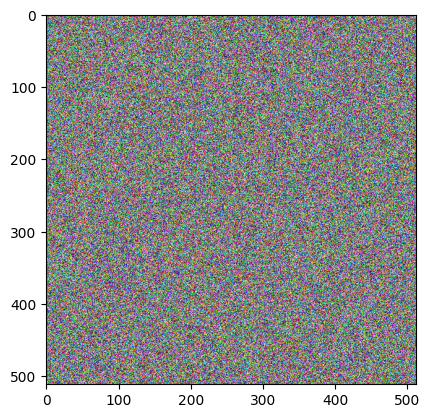

In [31]:
#Muestra de la Imagenn de salida
plt.imshow(Salida,vmin=0,vmax=1)
plt.show()

##Prueba 2

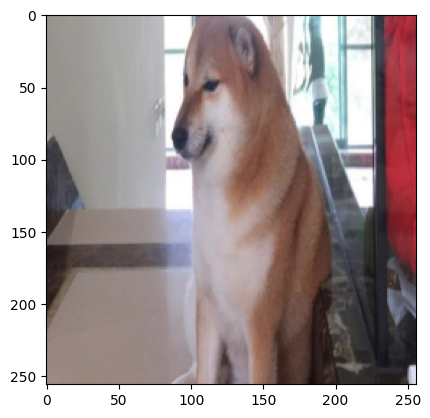

In [36]:
Imagen=io.imread("https://los40.cl/wp-content/uploads/2022/05/cheems-baltze-1-768x432.jpg")
res_img=cv.resize(Imagen, (256,256),interpolation = cv.INTER_AREA )
plt.imshow(res_img,vmin=0,vmax=1)
plt.show()

In [37]:
#Tamaño de la Imagenn 512x512
Salida=ImagenTransformadaFourier(res_img)

<ipython-input-29-7e82c731b3aa>:36: ComplexWarning: Casting complex values to real discards the imaginary part
  Imagen[i][j][0]=int((FilasRTransformadaFourier[i][j]**2+ColumnasRTransformadaFourier[i][j]**2)**(0.5))
<ipython-input-29-7e82c731b3aa>:37: ComplexWarning: Casting complex values to real discards the imaginary part
  Imagen[i][j][1]=int((FilasGTransformadaFourier[i][j]**2+ColumnasGTransformadaFourier[i][j]**2)**(0.5))
<ipython-input-29-7e82c731b3aa>:38: ComplexWarning: Casting complex values to real discards the imaginary part
  Imagen[i][j][2]=int((FilasBTransformadaFourier[i][j]**2+ColumnasBTransformadaFourier[i][j]**2)**(0.5))


Transformada de Fourier por filas:
[[47716.           +0.j         -2613.96837317+1676.53813624j
  -2802.14590388 +203.58707256j ...   902.72460254 +159.05382188j
  -2802.14590388 -203.58707256j -2613.96837317-1676.53813624j]
 [47295.           +0.j         -2301.71253558+1496.61636243j
  -2963.82535195 +297.00500446j ...  1157.26446837 +186.66625157j
  -2963.82535195 -297.00500446j -2301.71253558-1496.61636243j]
 [47044.           +0.j         -2136.25099492+1361.40733714j
  -3045.11182638 +332.15899546j ...  1389.2223446  +197.99476706j
  -3045.11182638 -332.15899546j -2136.25099492-1361.40733714j]
 ...
 [29745.           +0.j         -1856.61722837-7490.97919415j
   2231.39502807-1832.41518148j ...   809.14946446 +860.23951595j
   2231.39502807+1832.41518148j -1856.61722837+7490.97919415j]
 [29640.           +0.j         -1879.8382043 -7551.65633398j
   2205.77770838-1833.53071904j ...   784.0815664  +840.96645621j
   2205.77770838+1833.53071904j -1879.8382043 +7551.65633398j]
 [295

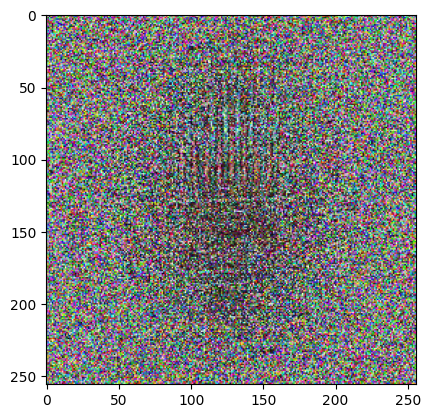

In [38]:
#Muestra de la Imagenn de salida
plt.imshow(Salida,vmin=0,vmax=1)
plt.show()